## CONCEPT OF DATA SCIENCE 
## TERNARY SEARCH TREE IMPLIMENTATION PROJECT
## LUCIA JANI 2470541
## TANJIM HOSSAIN 2469700

# Ternary Search Tree Demo
This notebook demonstrates how to use the Ternary Search Tree (TST).

## Implementation
The TST is composed of two classes: `TSTNode` for individual nodes and `TernarySearchTree` for the tree itself.

# Ternary Search Tree - Jupyter Notebook Version

In [40]:
from ternary_search_tree import TernarySearchTree


## Example Usage
 creating a TST and inserting some words into it.

In [31]:
import time
import os
import matplotlib.pyplot as plt

# Set up DATA_PATH for portability
DATA_PATH = os.path.join("data", "search_trees")

# Load dataset
with open(os.path.join(DATA_PATH, "corncob_lowercase.txt")) as f:
    all_words = [line.strip() for line in f if line.strip()]

sizes = [100, 500, 1000, 5000, 10000, 20000, 40000, 50000]
insert_times = []
search_times = []

overall_start = time.time()

for size in sizes:
    print(f"Benchmarking for size {size}...", flush=True)
    words = all_words[:size]
    tst = TernarySearchTree()
    # Insert timing
    t0 = time.time()
    for word in words:
        tst.insert(word)
    t_insert = time.time() - t0
    insert_times.append(t_insert)
    print(f"Insert time for {size}: {t_insert:.4f} sec", flush=True)
    # Search timing
    t0 = time.time()
    for word in words:
        tst.search(word)
    t_search = time.time() - t0
    search_times.append(t_search)
    print(f"Search time for {size}: {t_search:.4f} sec", flush=True)

overall_end = time.time()

print(f"\n==== Benchmark completed ====", flush=True)
print(f"Total runtime: {overall_end - overall_start:.2f} seconds", flush=True)
print(f"Insert times (s): {insert_times}", flush=True)
print(f"Search times (s): {search_times}", flush=True)


Benchmarking for size 100...
Insert time for 100: 0.0001 sec
Search time for 100: 0.0001 sec
Benchmarking for size 500...
Insert time for 500: 0.0008 sec
Search time for 500: 0.0006 sec
Benchmarking for size 1000...
Insert time for 1000: 0.0021 sec
Search time for 1000: 0.0013 sec
Benchmarking for size 5000...
Insert time for 5000: 0.0102 sec
Search time for 5000: 0.0069 sec
Benchmarking for size 10000...
Insert time for 10000: 0.0171 sec
Search time for 10000: 0.0113 sec
Benchmarking for size 20000...
Insert time for 20000: 0.0315 sec
Search time for 20000: 0.0242 sec
Benchmarking for size 40000...
Insert time for 40000: 0.1192 sec
Search time for 40000: 0.0505 sec
Benchmarking for size 50000...
Insert time for 50000: 0.0919 sec
Search time for 50000: 0.0667 sec

==== Benchmark completed ====
Total runtime: 0.45 seconds
Insert times (s): [0.00014400482177734375, 0.0008480548858642578, 0.002122163772583008, 0.010172128677368164, 0.01713109016418457, 0.03152012825012207, 0.1192269325256

In [7]:
tst = TernarySearchTree()

In [8]:
# Insert words into the tree
words = ['cat', 'cap', 'bat', 'bar', 'bag', 'apple']
for word in words:
    tst.insert(word)


### Searching in the Tree

In [9]:
# Search examples
print("Search 'cat':", tst.search('cat'))
print("Search 'can':", tst.search('can'))


Search 'cat': True
Search 'can': False


### Prefix Search

In [10]:
# Prefix search example
print("Prefix search for 'ba':", tst.prefix_search('ba'))


Prefix search for 'ba': ['bat', 'bar', 'bag']


### Count of Words Stored

In [11]:
# Count of stored words
print("Total words stored:", tst.count())


Total words stored: 6


### Display All Strings

In [12]:
# Display all strings
print("All words in TST:", tst.all_strings())


All words in TST: ['apple', 'bag', 'bar', 'bat', 'cap', 'cat']


### ASCII Display

In [13]:
# ASCII display of the TST
tst.ascii_display()


ASCII representation of TST:
 |-----[c]
 |     |-----[a]
 |     |     |-----[t]*
 |     |          -----[p]*
      -----[b]
      |     |-----[a]
      |     |     |-----[t]*
      |     |          -----[r]*
      |     |               -----[g]*
           -----[a]
           |     |-----[p]
           |     |     |-----[p]
           |     |     |     |-----[l]
           |     |     |     |     |-----[e]*


# Benchmarking TST insert and search
## Ternary Search Tree Benchmarking

The following benchmarking code measures the performance of the Ternary Search Tree (TST) for both insertion and search operations using a large dataset of English words. It loads a word list, tests the TST with increasing numbers of words, and plots the time taken for both insert and search operations.

**Benchmarking steps:**
- Loads a large list of words from a file.
- Benchmarks TST insertion and search for various dataset sizes.
- Plots the total time for insert and search as the dataset grows.
- Plots the average time per word for both operations.

This helps visualize how the TST scales with input size and provides insight into its efficiency for large datasets.

In [48]:
import time
import matplotlib.pyplot as plt
from ternary_search_tree import TernarySearchTree

Set Data Path Cell

In [50]:
DATA_PATH = "/Users/tanjimhossain/Documents/Concepts of Data Science/CDS_final-project/data/search_trees/"

Load Words Cell

In [51]:
# Load a large list of words
with open(DATA_PATH + "corncob_lowercase.txt") as f:
    all_words = [line.strip() for line in f if line.strip()]

. Benchmark Setup Cell

In [52]:
# Choose different sizes for benchmarking
sizes = [100, 500, 1000, 5000, 10000, 20000, 40000, 50000]
insert_times = []
search_times = []

Benchmark Loop Cell

In [64]:
import time
import os
import matplotlib.pyplot as plt

# Set up DATA_PATH for portability
DATA_PATH = os.path.join("data", "search_trees")

# Load dataset
with open(os.path.join(DATA_PATH, "corncob_lowercase.txt")) as f:
    all_words = [line.strip() for line in f if line.strip()]

sizes = [100, 500, 1000, 5000, 10000, 20000, 40000, 50000]
insert_times = []
search_times = []

overall_start = time.time()

for size in sizes:
    print(f"Benchmarking for size {size}...", flush=True)
    words = all_words[:size]
    tst = TernarySearchTree()
    # Insert timing
    t0 = time.time()
    for word in words:
        tst.insert(word)
    t_insert = time.time() - t0
    insert_times.append(t_insert)
    print(f"Insert time for {size}: {t_insert:.4f} sec", flush=True)
    # Search timing
    t0 = time.time()
    for word in words:
        tst.search(word)
    t_search = time.time() - t0
    search_times.append(t_search)
    print(f"Search time for {size}: {t_search:.4f} sec", flush=True)

overall_end = time.time()

print(f"\n==== Benchmark completed ====", flush=True)
print(f"Total runtime: {overall_end - overall_start:.2f} seconds", flush=True)
print(f"Insert times (s): {insert_times}", flush=True)
print(f"Search times (s): {search_times}", flush=True)

Benchmarking for size 100...
Insert time for 100: 0.0002 sec
Search time for 100: 0.0002 sec
Benchmarking for size 500...
Insert time for 500: 0.0009 sec
Search time for 500: 0.0007 sec
Benchmarking for size 1000...
Insert time for 1000: 0.0024 sec
Search time for 1000: 0.0013 sec
Benchmarking for size 5000...
Insert time for 5000: 0.0110 sec
Search time for 5000: 0.0070 sec
Benchmarking for size 10000...
Insert time for 10000: 0.0179 sec
Search time for 10000: 0.0118 sec
Benchmarking for size 20000...
Insert time for 20000: 0.0328 sec
Search time for 20000: 0.0233 sec
Benchmarking for size 40000...
Insert time for 40000: 0.1056 sec
Search time for 40000: 0.0506 sec
Benchmarking for size 50000...
Insert time for 50000: 0.0902 sec
Search time for 50000: 0.0662 sec

==== Benchmark completed ====
Total runtime: 0.44 seconds
Insert times (s): [0.00020813941955566406, 0.0009441375732421875, 0.0023970603942871094, 0.01100611686706543, 0.017920970916748047, 0.03277921676635742, 0.105573892593

Insert/Search Time vs. Number of Words

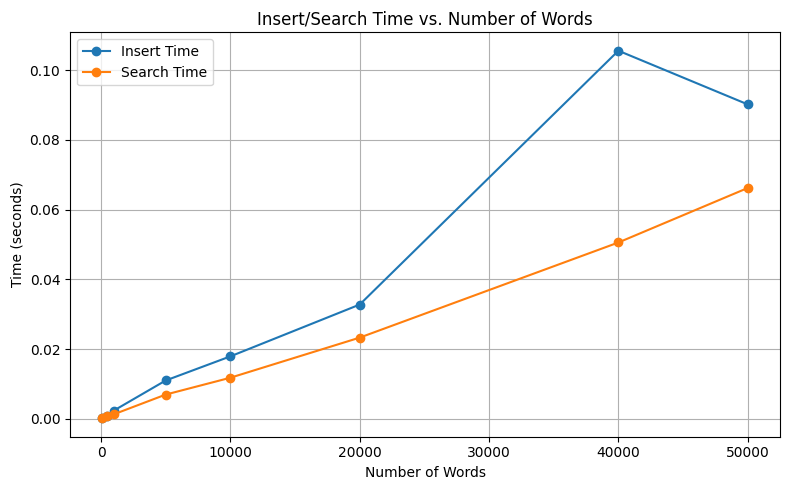

In [67]:
plt.figure(figsize=(8,5))
plt.plot(sizes, insert_times, marker='o', label="Insert Time")
plt.plot(sizes, search_times, marker='o', label="Search Time")
plt.xlabel("Number of Words")
plt.ylabel("Time (seconds)")
plt.title("Insert/Search Time vs. Number of Words")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("TST_total_time.png")
plt.show()

Average Time per Word vs. Number of Words

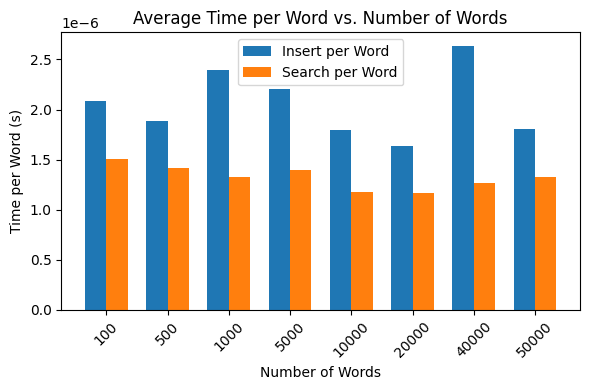

PNG plots saved in: /Users/tanjimhossain/Documents/Concepts of Data Science/cds-final-project-tst


In [68]:
per_word_insert = [t/s for t,s in zip(insert_times, sizes)]
per_word_search = [t/s for t,s in zip(search_times, sizes)]
x = range(len(sizes))
width = 0.35
plt.figure(figsize=(6,4))
plt.bar(x, per_word_insert, width, label="Insert per Word")
plt.bar([i+width for i in x], per_word_search, width, label="Search per Word")
plt.xticks([i+width/2 for i in x], sizes, rotation=45)
plt.xlabel("Number of Words")
plt.ylabel("Time per Word (s)")
plt.title("Average Time per Word vs. Number of Words")
plt.legend()
plt.tight_layout()
plt.savefig("TST_avg_time.png")
plt.show()
print("PNG plots saved in:", os.getcwd())